# **Spaceship Titanic**

# **Import Library Datasets**

In [1]:
!pip install catboost

In [2]:
import numpy as np
import pandas as pd
from catboost import Pool, CatBoostClassifier as CBC
from sklearn.ensemble import GradientBoostingClassifier as GD
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV as GCV
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df_tn = pd.read_csv(r"/Users/saikumargv/Downloads/spaceship-titanic/train.csv")
df_tt = pd.read_csv(r"/Users/saikumargv/Downloads/spaceship-titanic/test.csv")

df_tn.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_tn['Train'] = 'Yes'
df_tt['Train'] = 'No'

In [5]:
combine = pd.concat([df_tn, df_tt])
combine

/Users/saikumargv/opt/miniconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/saikumargv/opt/miniconda3/lib/python3.9/site-packages/IPython/core/formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Train
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Yes
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Yes
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Yes
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Yes
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,No
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,No
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,No
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,No


# **EDA (Exploratory Data Analysis)**

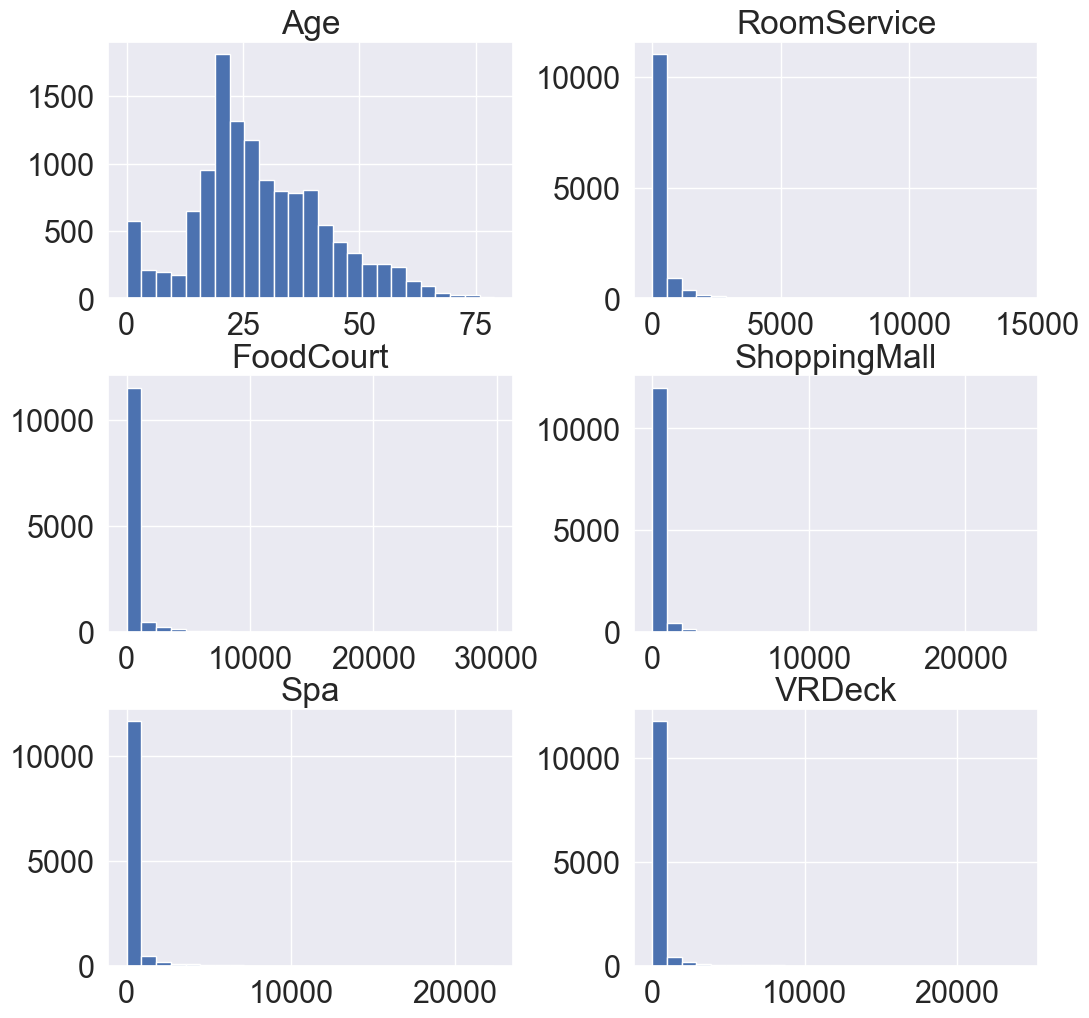

In [6]:
combine.hist(bins = 25, figsize = (12, 12))
plt.show()

NameError: name 'concat' is not defined

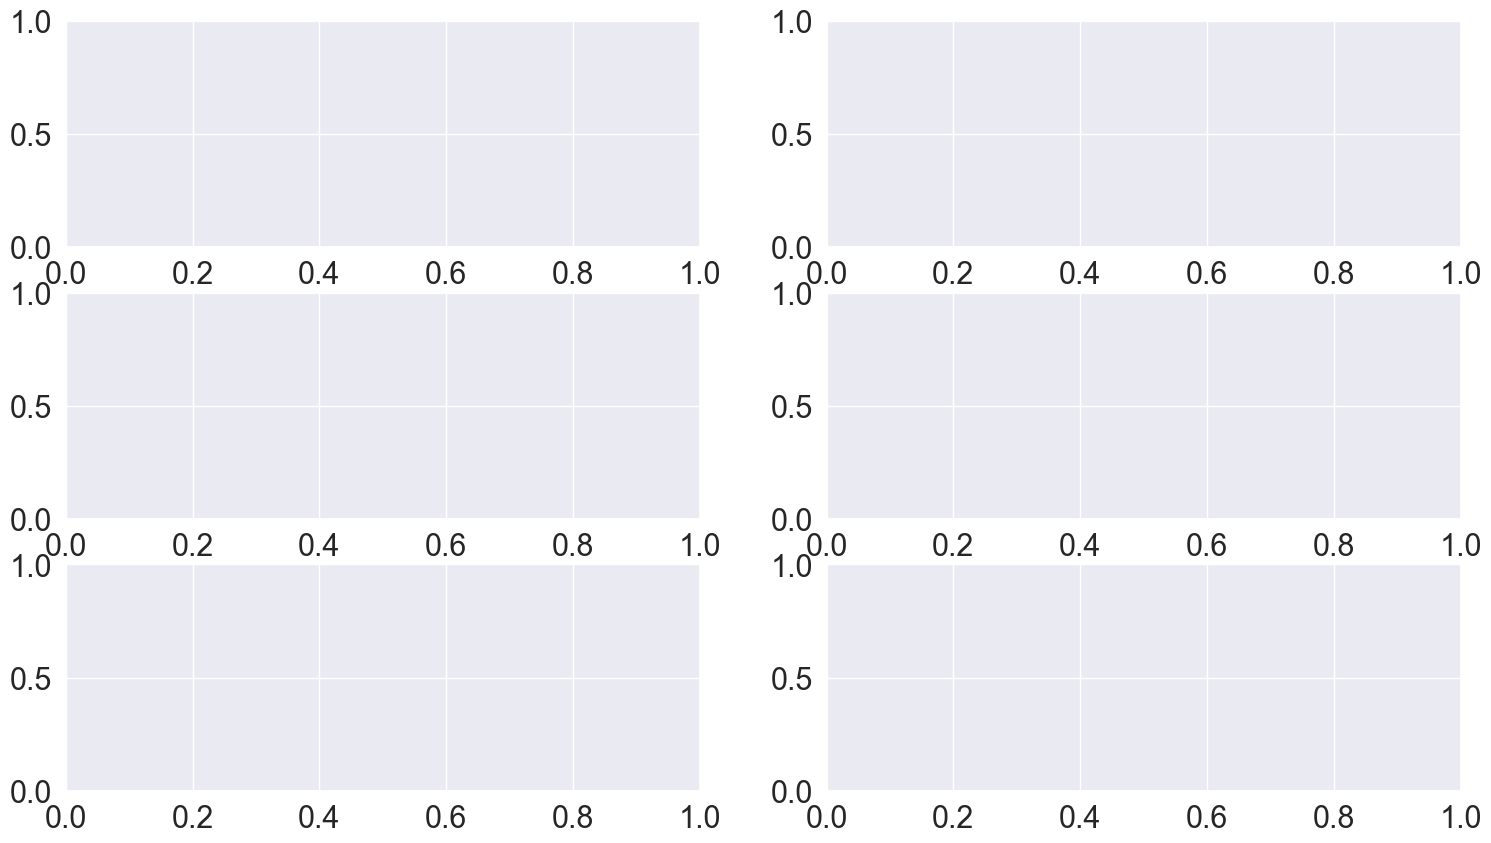

In [7]:
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',]
q, r =divmod(len(columns), 2)
fig, ax=plt.subplots(q, 2, figsize=(18,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 2)
    sns.boxplot(data=concat, x=columns[i], ax=ax[q, r])
plt.show()

# **Feature engineering**

# Imputation

In [ ]:
combine.isnull().sum()

**Missing Data (Numerical)**

In [ ]:
combine[['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].median()

In [ ]:
combine[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = concat[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [ ]:
combine['Age'] = combine['Age'].fillna(combine['Age'].median())

**Missing Data (Categorical)**

In [ ]:
combine['VIP'].value_counts()

In [ ]:
combine['VIP'] = combine['VIP'].fillna(False)

In [ ]:
combine['HomePlanet'].value_counts()

In [ ]:
combine['HomePlanet'] = combine['HomePlanet'].fillna('Mars')

In [ ]:
combine['Destination'].value_counts()

In [ ]:
combine['Destination'] =combine['Destination'].fillna("'TRAPPIST-1e")

In [ ]:
combine['CryoSleep'].value_counts()

In [ ]:
combine['CryoSleep'] = combine['CryoSleep'].fillna(False)

In [ ]:
combine[['Deck', 'Num', 'Side']] = combine['Cabin'].str.split('/', expand=True)
combine

In [ ]:
combine['Deck'].value_counts()

In [ ]:
combine['Deck'] = combine['Deck'].fillna('T')

In [ ]:
combine['Num'].value_counts()

In [ ]:
combine['Num'] = combine['Num'].fillna('0')

In [ ]:
combine['Side'].value_counts()

In [ ]:
combine['Side'] = combine['Side'].fillna('P')

In [ ]:
combine['Sum_spend'] = combine['RoomService'] + combine['FoodCourt'] + combine['ShoppingMall'] + combine['Spa'] + combine['VRDeck']
combine

In [ ]:
combine['AgeGroup'] = pd.cut(combine.Age, bins=[-1, 5, 13, 18, 60, 100], labels = ['Baby', 'Child', 'Teen', 'Adult', 'Elderly'])
combine

In [ ]:
combine = combine.drop(['Name', 'Cabin'],axis=1)
combine

In [ ]:
combine.isnull().sum()

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num', 'AgeGroup']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr = np.array(combine[i]).astype(str)
    le.fit(arr)
    combine[i]=le.transform(combine[i].astype(str))

In [ ]:
combine.set_index('PassengerId',inplace=True)

In [ ]:
combine.head()

In [ ]:
df_tn = combine[concat['Train'] == 'Yes']
df_tn.drop('Train', axis=1, inplace=True)
df_tn

In [ ]:
df_tt = combine[combine['Train'] == 'No']
df_tt.drop('Train', axis=1, inplace=True)
df_tt

In [ ]:
df_tn['Transported']=df_tn['Transported'].replace({True:1,False:0})
df_tn

In [ ]:
X=df_tn.drop('Transported',axis=1)
y = df_tn['Transported']

In [ ]:
X.columns

In [ ]:
X_tn, X_v, y_tn, y_v = train_test_split(X, y, test_size=0.2, random_state=0)

# **Model selection**

In [ ]:
from catboost import CatBoostClassifier
cat=CBC(iterations=1500,
        eval_metric='Accuracy',
        verbose=0)

In [ ]:
cat.fit(X_tn,y_tn)

In [ ]:
pred = cat.predict(X_tn)
predict_y = cat.predict(X_v)

In [ ]:
print(acc_score(y_tn.values,pred))
print(acc_score(y_v.values,predict_y))

In [ ]:
gb=GD(random_state=1,n_estimators=300,learning_rate=0.15,max_depth=4)

In [ ]:
gb.fit(X_tn,y_tn)

In [ ]:
pred=gb.predict(X_tn)
pred_y=gb.predict(X_v)

In [ ]:
print(acc_score(y_tn.values,pred))
print(acc_score(y_v.values,predict_y))

In [ ]:
gcv=GCV(CBC(),param_grid={'iterations': range(200,2000,200), 'eval_metric': ['Accuracy'],'verbose':[0]},cv=3)

In [ ]:
gcv.fit(X_tn,y_tn)

In [ ]:
pred=gcv.predict(X_tn)
predict_y=gcv.predict(X_val)

In [ ]:
print(acc_score(y_tn.values,pred))
print(acc_score(y_v.values,predict_y))

In [ ]:
gcv.fit(X,y)

In [ ]:
y_pred = gcv.predict(df_test)

# **Submission**

In [ ]:
sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=df_test.index)
sub.reset_index(inplace=True)
sub.head()

In [ ]:
sub.to_csv('submission2.csv', index=False)